The file charts.csv is 18.2mb with 330,087 observations. The sql data is 1.92mb with 18,393 observations.

The most computationally expensive operation was applying the function scrape_review_text to the two separate series. This function used beautiful soup to scrape pitchfork's website for the review blurb and added it to a new dataframe. Our workaround for this lengthy and expensive function was to, rather than chunk/separate the entirety of the song data, was to sample 100 reviews from the dataset. This sped up the process and limited the memory usage in that function and all consequential manipulations.

In [45]:
import pandas as pd 
import sqlite3

## <font color="magenta"> Problem Statement

Are songs on the Billboard Hot 100 more highly reviewed or more highly criticized vs songs that have not appeared on the Billboard Hot 100?

## <font color="magenta">  Data 

To answer this question we pulled in 2 datasets. We pulled in the Billboard Hot 100 JSON data and a Kagel sqlite database containing Pitchfork data which is a popular song review website.

We pulled data on song title, artist, weeks on Billboard, peak rank, Pitchfork review body, and other.

In [46]:
billboard = pd.read_csv("charts.csv")

In [47]:
con = sqlite3.connect("database.sqlite")
reviews_df = pd.read_sql_query("SELECT * from reviews", con)
con.close()

## <font color="magenta">  Data Cleaning

In this section, we applied functions lower and trip to the artist and song title columns to ensure we may match songs and artists appropriately, without missing any data

In [48]:
billboard['artist'] = billboard['artist'].apply(str.lower)
billboard['artist'] = billboard['artist'].apply(str.strip)
reviews_df['artist'] = reviews_df['artist'].apply(str.lower)
reviews_df['artist'] = reviews_df['artist'].apply(str.strip)

In [49]:
billboard['song'] = billboard['song'].apply(str.lower)
billboard['song'] = billboard['song'].apply(str.strip)
reviews_df['title'] = reviews_df['title'].apply(str.lower)
reviews_df['title'] = reviews_df['title'].apply(str.strip)

## <font color="magenta">  Data Manipulation

Here we performed an inner merge on the reviews_df (pitchfork data) and billboard df (billboard data). The merged dataframe is titled merge.

We then changed column order to read easier

We then dropped url duplicates

## <font color="magenta">   Analysis

To present our analysis, we created a histogram of the percentage of scores for songs that were on the Billboard Top 100 and songs that were not on the Billboard Top 100.

From this graph, we can see that there is not a significant difference in scores for the song groups.


## <font color="magenta"> Songs on Billboard Hot 100 vs Not on the Billboard Hot 100

In [9]:
merge = reviews_df.merge(billboard, left_on = "title", right_on="song", how="inner")
merge['artist'] = merge['artist_y']
merge = merge.drop(['artist_x', 'artist_y','title','author_type'], axis=1)

In [10]:
cols =  ['date',
 'rank',
 'song','artist',
 'last-week',
 'peak-rank',
 'weeks-on-board',
 'reviewid',
 'url',
 'score',
 'best_new_music',
 'author',
 'pub_date',
 'pub_weekday',
 'pub_day',
 'pub_month',
 'pub_year']

In [11]:
merge = merge[cols]

In [12]:
merge.drop_duplicates(subset=['url'],keep='last')

,date,rank,song,artist,last-week,peak-rank,weeks-on-board,reviewid,url,score,best_new_music,author,pub_date,pub_weekday,pub_day,pub_month,pub_year
0,2016-12-31,29,4 your eyez only,j. cole,NaN,29,1,22696,http://pitchfork.com/reviews/albums/22696-4-yo...,6.7,0,paul a. thompson,2016-12-14,2,14,12,2016
3,1975-08-23,90,out of time,the rolling stones,NaN,90,1,22669,http://pitchfork.com/reviews/albums/22669-out-...,8.4,0,evan rytlewski,2016-12-02,4,2,12,2016
6,1975-08-23,90,out of time,the rolling stones,NaN,90,1,19985,http://pitchfork.com/reviews/albums/19985-houn...,6.8,0,paul thompson,2014-11-26,2,26,11,2014
47,2016-10-29,5,24k magic,bruno mars,NaN,5,1,22634,http://pitchfork.com/reviews/albums/22634-24k-...,6.2,0,katherine st. asaph,2016-12-02,4,2,12,2016
77,2016-10-08,40,starboy,the weeknd featuring daft punk,NaN,40,1,22668,http://pitchfork.com/reviews/albums/22668-star...,6.7,0,mehan jayasuriya,2016-11-30,2,30,11,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22913,2020-05-02,44,pick up,dababy featuring quavo,NaN,44,1,7323,http://pitchfork.com/reviews/albums/7323-pick-up/,7.6,0,s. murray,1999-09-14,1,14,9,1999
22951,1961-02-20,24,surrender,elvis presley with the jordanaires,NaN,24,1,1412,http://pitchfork.com/reviews/albums/1412-surre...,9.0,0,sarah zupko,1999-06-29,1,29,6,1999
22955,2020-11-14,92,stay down,"lil durk, 6lack & young thug",NaN,92,1,8224,http://pitchfork.com/reviews/albums/8224-stay-...,9.3,0,paul cooper,1999-06-22,1,22,6,1999
22974,2000-07-29,72,californication,red hot chili peppers,NaN,72,1,6709,http://pitchfork.com/reviews/albums/6709-calif...,6.8,0,brent dicrescenzo,1999-06-08,1,8,6,1999


In [13]:
unique = merge.drop_duplicates(subset ="song")

In [14]:
nottop = reviews_df[~reviews_df['title'].isin(billboard['song'])]
nottop = nottop.drop_duplicates(subset=['url'],keep='last')

## <font color="magenta"> Graphs

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
unique.shape

(701, 17)

In [17]:
not_top_sample = nottop.sample(701)

In [18]:
rating_top = unique.score.to_list()
id_top = unique.reviewid.to_list()

In [19]:
rating_nottop = not_top_sample.score.to_list()
not_id = not_top_sample.reviewid.to_list()

## Goal:
Are songs on the billboard Hot 100 ranked higher than songs not on the chart?

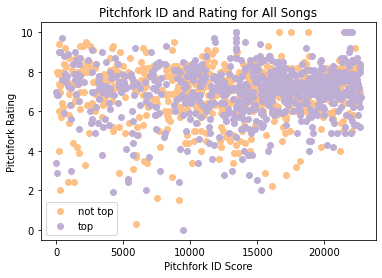

In [55]:
plt.scatter(x= not_id, y = rating_nottop, color = "#fdc086", label = "not top")
plt.scatter(x= id_top , y = rating_top, color = "#beaed4", label = "top" )
plt.title('Pitchfork ID and Rating for All Songs')
plt.xlabel('Pitchfork ID Score')
plt.ylabel('Pitchfork Rating')
plt.legend()

## Goal:
Is there a relationship between the location of a song on billboard hot 100 charts and pitchfork score?

In [22]:
billboard_rank = unique['peak-rank'].to_list()

Text(0, 0.5, 'Pitchfork Rating')

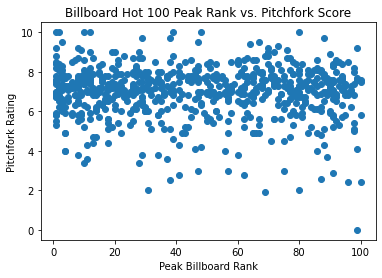

In [54]:
plt.scatter(x=  billboard_rank , y = rating_top )
plt.title("Billboard Hot 100 Peak Rank vs. Pitchfork Score")
plt.xlabel('Peak Billboard Rank')
plt.ylabel('Pitchfork Rating')

In [24]:
unique[unique['peak-rank'] == 100]

,date,rank,song,artist,last-week,peak-rank,weeks-on-board,reviewid,url,score,best_new_music,author,pub_date,pub_weekday,pub_day,pub_month,pub_year
580,2017-11-11,100,three,future & young thug,NaN,100,1,22471,http://pitchfork.com/reviews/albums/22471-three/,5.8,0,zoe camp,2016-10-07,4,7,10,2016
1737,2017-06-17,100,strangers,halsey featuring lauren jauregui,NaN,100,1,21864,http://pitchfork.com/reviews/albums/21864-stra...,7.6,0,marcus j. moore,2016-05-21,5,21,5,2016
19715,2014-05-17,100,the big bang,katy tiz,NaN,100,1,9123,http://pitchfork.com/reviews/albums/9123-the-b...,2.4,0,sean fennessey,2006-06-29,3,29,6,2006
20994,2012-03-17,100,thank you,estelle,NaN,100,1,2049,http://pitchfork.com/reviews/albums/2049-thank...,7.5,0,johnny loftus,2004-07-05,0,5,7,2004


### <font color="magenta"> Sentiment Analysis

## Goal:
Is there a correlation between the sentiment analysis of a song review and if it was on the Billboard Top 100?

In [35]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from bs4 import BeautifulSoup
import requests
import json
sid = SentimentIntensityAnalyzer()

def scrape_review_text(url):
    response = requests.get(url)
    #response_dict = json.loads(response.text)
    soup = BeautifulSoup(response.text)
    paragraph = soup.find('meta', { 'name': "description" })
    return str(paragraph)

sampled_on_billboard = unique['url'].sample(100)
sampled_not_billboard = nottop['url'].sample(100)

In [36]:
billboard_article_bodies = sampled_on_billboard.apply(scrape_review_text)
not_article_bodies = sampled_not_billboard.apply(scrape_review_text)

In [37]:
def apply_sentiment(column):
    ss = sid.polarity_scores(column)
    return ss
def apply_compound(column):
    return column['compound']
def apply_negative(column):
    return column['neg']
def apply_pos(column):
    return column['pos']

In [38]:
#making the article body dataframes (not on billboard)
not_article_body_df = pd.DataFrame(not_article_bodies)
not_article_body_df = not_article_body_df.rename(columns = {'url':'body'})
not_article_body_df['url'] = sampled_not_billboard
not_article_body_df['sentiment'] = not_article_body_df['body'].apply(apply_sentiment)
not_article_body_df['compound'] = not_article_body_df['sentiment'].apply(apply_compound)


In [39]:
#making the article body dataframes (on billboard)
article_body_df = pd.DataFrame(billboard_article_bodies)
article_body_df = article_body_df.rename(columns = {'url':'body'})
article_body_df['url'] = sampled_on_billboard
article_body_df['sentiment'] = article_body_df['body'].apply(apply_sentiment)
article_body_df['compound'] = article_body_df['sentiment'].apply(apply_compound)
article_body_df['negative'] = article_body_df['sentiment'].apply(apply_negative)
article_body_df['peak-rank'] = unique['peak-rank'].iloc[0:300]
article_body_df['weeks-on-board'] = unique['weeks-on-board'].iloc[0:300]

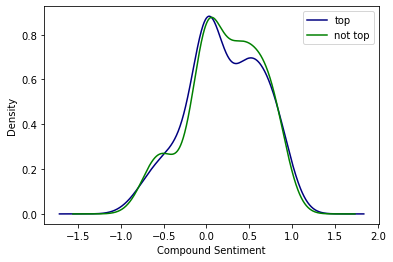

In [43]:
#histogram comparing the seniment analysis of songs on billboard and songs not
on_100 = article_body_df['compound'].plot.density(color = 'navy',label = "top")
not_100 = not_article_body_df['compound'].plot.density(color = 'green',label = "not top")
plt.xlabel('Compound Sentiment')
plt.ylabel('Density')
plt.legend()

In [44]:
# on_100 = article_body_df['compound'].hist(density=True, color = 'navy', label = "top")
# not_100 = not_article_body_df['compound'].hist(density=True, color = 'green', label="not top")

## <font color="magenta">   Take-aways

After our data collection and analysis, we have come to the conclusion that there is no evidence to show that a song being on the Billboard Top 100 list correlates to a higher Pitchfork review score or a more positive sentiment analysis. 